## Lead Scoring Case Study

### Out of the data provided  we need to select the most promising leads, i.e. the leads that are most likely to convert into paying customers for education company X Education which sells online courses to industry professionals. The company requires us to build a model wherein we need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance.

## Step 1: Importing import packages and Reading Data

In [1]:
#import all the necessary libraries

import pandas as pd
import numpy as np

# For Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# To Scale our data
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)


# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')


In [2]:
#Importing the Data

data=pd.read_csv("C://Users//mohit//Downloads//Mohit Data Science//Lead case study//Lead+Scoring+Case+Study//Lead Scoring Assignment//leads.csv")
data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
data.shape

(9240, 37)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

In [5]:
data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [6]:
#check missing percentage
percent_missing = (data.isnull().sum() / data.isnull().count()*100).sort_values(ascending = False)
percent_missing


Lead Quality                                     51.590909
Asymmetrique Profile Score                       45.649351
Asymmetrique Activity Score                      45.649351
Asymmetrique Profile Index                       45.649351
Asymmetrique Activity Index                      45.649351
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
Lead Profile                                     29.318182
What is your current occupation                  29.112554
Country                                          26.634199
How did you hear about X Education               23.885281
Specialization                                   15.562771
City                                             15.367965
TotalVisits                                       1.482684
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Lead Source                                       0.3896

In [7]:
# removing duplicate rows
data.drop_duplicates(subset='Lead Number')
data.shape

(9240, 37)

## Data Preparation

In [8]:
#in some columns customer have not selected anything so it's showing select , replacing it with nan
data = data.replace('Select', np.nan)

In [9]:
# removing duplicate rows
data.drop_duplicates(subset='Lead Number')
data.shape

(9240, 37)

In [10]:
# # removing all columns with missing values more than 30%
# data.drop(['Lead Quality','Asymmetrique Profile Score','Asymmetrique Activity Score','Asymmetrique Profile Index','Asymmetrique Activity Index','Tags'],axis = 1 , inplace=True)
data.isnull().sum()


Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [11]:
#check missing percentage
percent_missing1 = (data.isnull().sum() / data.isnull().count()*100).sort_values(ascending = False)
percent_missing1

How did you hear about X Education               78.463203
Lead Profile                                     74.188312
Lead Quality                                     51.590909
Asymmetrique Profile Score                       45.649351
Asymmetrique Activity Score                      45.649351
Asymmetrique Profile Index                       45.649351
Asymmetrique Activity Index                      45.649351
City                                             39.707792
Specialization                                   36.580087
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
TotalVisits                                       1.482684
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Lead Source                                       0.3896

In [12]:
# removing all columns with missing values more than 40%
data.drop(['How did you hear about X Education','Lead Profile','Lead Quality','Asymmetrique Profile Score','Asymmetrique Activity Score','Asymmetrique Profile Index','Asymmetrique Activity Index'],axis = 1 , inplace=True)



### let's check each columns with high missing percentage to check if some imputation can be used or not
### if we have a categorical column then we can use nan value as others or impute the mode of that column and then later on we can eliminate it while making dummy variable


In [13]:
#check missing percentage
percent_missing1 = (data.isnull().sum() / data.isnull().count()*100).sort_values(ascending = False)
percent_missing1

City                                             39.707792
Specialization                                   36.580087
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
TotalVisits                                       1.482684
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Lead Source                                       0.389610
Lead Number                                       0.000000
Lead Origin                                       0.000000
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
Total Time Spent on Website                       0.000000
Last Notable Activity                             0.0000

### Treating missing values

In [14]:
data['City'].value_counts()

Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

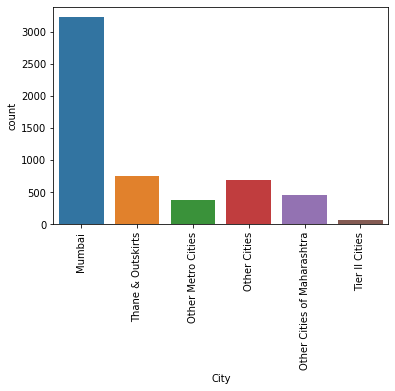

In [15]:
sns.countplot(data['City'])
plt.xticks(rotation = 90)

In [16]:
# As we can see that Mumbai is where majority of leads have come , so lets impute Mumbai in place of nan values 
data['City'] = data['City'].replace(np.nan, 'Mumbai')

In [17]:
#Specialization column 

data['Specialization'].value_counts()

Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Media and Advertising                203
Travel and Tourism                   203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: Specialization, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]), <a list of 18 Text xticklabel objects>)

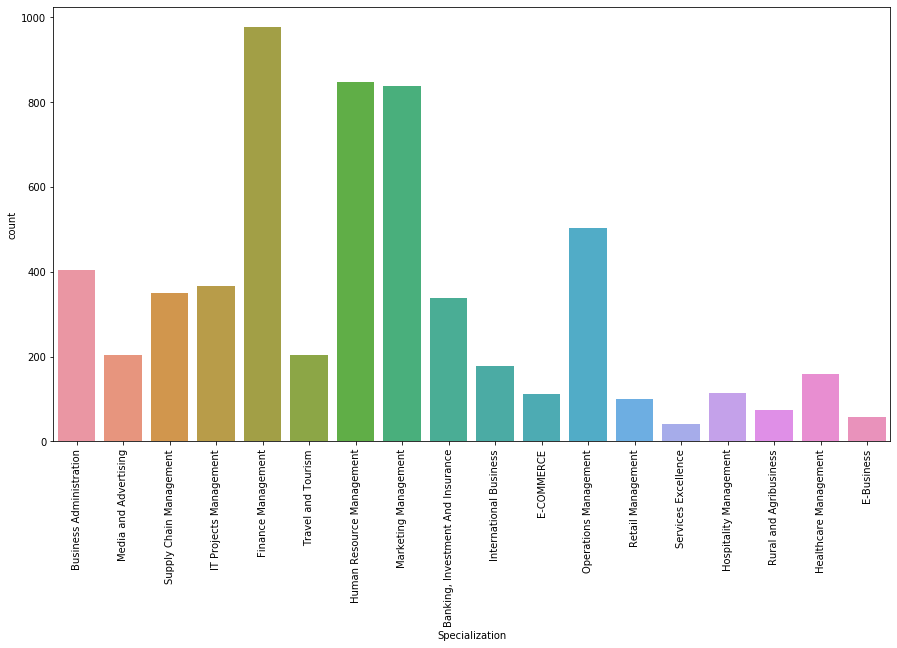

In [18]:
plt.figure(figsize=(15,8))
sns.countplot(data['Specialization'])
plt.xticks(rotation = 90)

In [19]:
#Replacing nan values as others as field was left blank by customer because of unavailability of their specialization
data['Specialization'] = data['Specialization'].replace(np.nan, 'Others')


In [20]:
# Tags Column

data['Tags'].value_counts()

Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to Others

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 <a list of 26 Text xticklabel objects>)

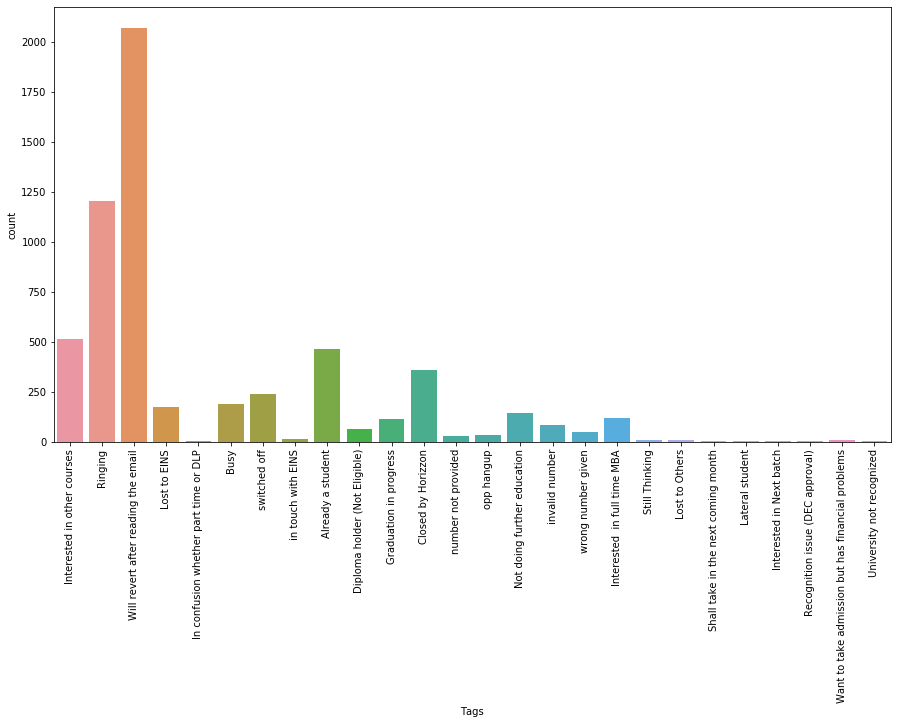

In [21]:
plt.figure(figsize=(15,8))
sns.countplot(data['Tags'])
plt.xticks(rotation = 90)

In [22]:
# As we can see that Will revert after reading the email is what majority of leads have done , so lets impute Will revert after reading the email in place of nan values 
data['Tags'] = data['Tags'].replace(np.nan, 'Will revert after reading the email')

In [23]:
# What matters most to you in choosing a course Column


data['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

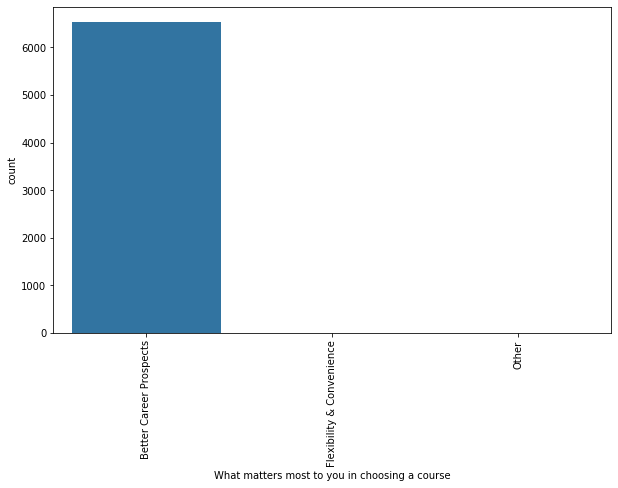

In [24]:
plt.figure(figsize=(10,6))
sns.countplot(data['What matters most to you in choosing a course'])
plt.xticks(rotation = 90)

In [25]:
#Replacing nan values as Better career prospects due to majority as field was left blank by customer because of unavailability of their specialization
data['What matters most to you in choosing a course'] = data['What matters most to you in choosing a course'].replace(np.nan, 'Better Career Prospects')


In [26]:
# What is your current occupation Column
data['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

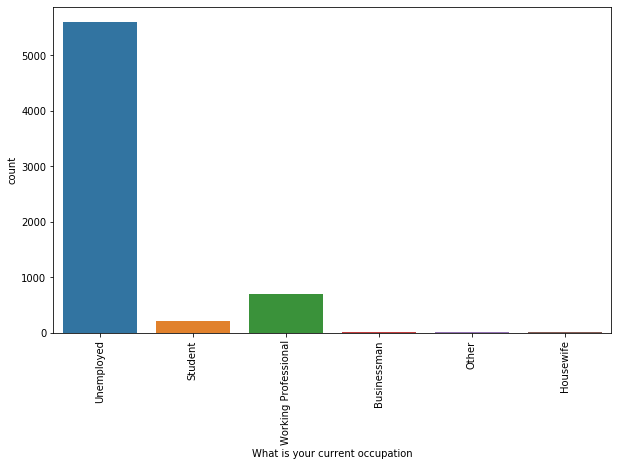

In [27]:
plt.figure(figsize=(10,6))
sns.countplot(data['What is your current occupation'])
plt.xticks(rotation = 90)

In [28]:
# As majority of people are unemployed so replacing nan values with unemployed
data['What is your current occupation'] = data['What is your current occupation'].replace(np.nan, 'Unemployed')


In [29]:
# Country Column

data['Country'].value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
France                     6
Oman                       6
unknown                    5
Germany                    4
Canada                     4
South Africa               4
Nigeria                    4
Kuwait                     4
Sweden                     3
Philippines                2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
China                      2
Ghana                      2
Netherlands                2
Asia/Pacific Region        2
Vietnam                    1
Russia                     1
Kenya                      1
Tanzania                   1
Indonesia                  1
Malaysia                   1
Sri Lanka     

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37]), <a list of 38 Text xticklabel objects>)

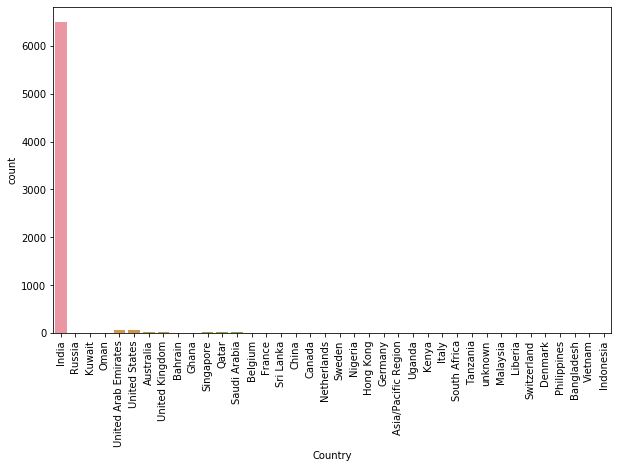

In [30]:
plt.figure(figsize=(10,6))
sns.countplot(data['Country'])
plt.xticks(rotation = 90)

In [31]:
# As majority of people are indian so replacing nan values with India
data['Country'] = data['Country'].replace(np.nan, 'India')


In [32]:
#check missing percentage
percent_missing = (data.isnull().sum() / data.isnull().count()*100).sort_values(ascending = False)
percent_missing


TotalVisits                                      1.482684
Page Views Per Visit                             1.482684
Last Activity                                    1.114719
Lead Source                                      0.389610
Last Notable Activity                            0.000000
A free copy of Mastering The Interview           0.000000
Lead Number                                      0.000000
Lead Origin                                      0.000000
Do Not Email                                     0.000000
Do Not Call                                      0.000000
Converted                                        0.000000
Total Time Spent on Website                      0.000000
Country                                          0.000000
Specialization                                   0.000000
What is your current occupation                  0.000000
What matters most to you in choosing a course    0.000000
Search                                           0.000000
Magazine      

In [33]:
#as other missing vaues are below 2% so we can consider dropping them.
data.dropna(inplace = True)


In [34]:
#check missing percentage
percent_missing = (data.isnull().sum() / data.isnull().count()*100).sort_values(ascending = False)
percent_missing


Last Notable Activity                            0.0
A free copy of Mastering The Interview           0.0
Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                             

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 30 columns):
Prospect ID                                      9074 non-null object
Lead Number                                      9074 non-null int64
Lead Origin                                      9074 non-null object
Lead Source                                      9074 non-null object
Do Not Email                                     9074 non-null object
Do Not Call                                      9074 non-null object
Converted                                        9074 non-null int64
TotalVisits                                      9074 non-null float64
Total Time Spent on Website                      9074 non-null int64
Page Views Per Visit                             9074 non-null float64
Last Activity                                    9074 non-null object
Country                                          9074 non-null object
Specialization                                   9074 

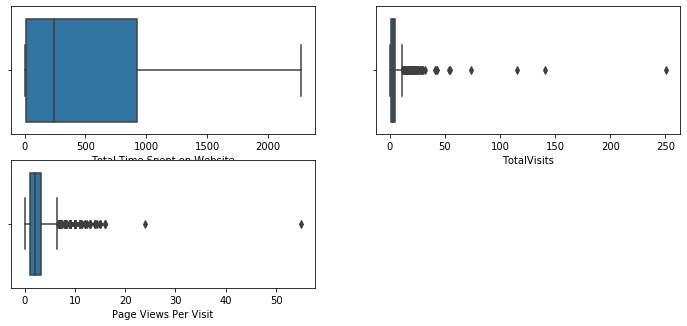

In [36]:
# Check outliers
plt.figure(figsize = (12,8))
var=['Total Time Spent on Website','TotalVisits','Page Views Per Visit']
for i in enumerate(var):
    plt.subplot(3,2,i[0]+1)
    sns.boxplot(x = i[1], data = data)
    

In [37]:
#Treating Outlier

q1 = data['TotalVisits'].quantile(0.05)
q4 = data['TotalVisits'].quantile(0.95)
data = data[(data['TotalVisits']>=q1) & (data['TotalVisits']<=q4)]
data.shape

(8721, 30)

In [38]:
#Treating Outlier

q1 = data['Page Views Per Visit'].quantile(0.05)
q4 = data['Page Views Per Visit'].quantile(0.95)
data = data[(data['Page Views Per Visit']>=q1) & (data['Page Views Per Visit']<=q4)]
data.shape

(8445, 30)

In [39]:
#Treating Outlier

q1 = data['Total Time Spent on Website'].quantile(0.02)
q4 = data['Total Time Spent on Website'].quantile(0.98)
data = data[(data['Total Time Spent on Website']>=q1) & (data['Total Time Spent on Website']<=q4)]
data.shape

(8276, 30)

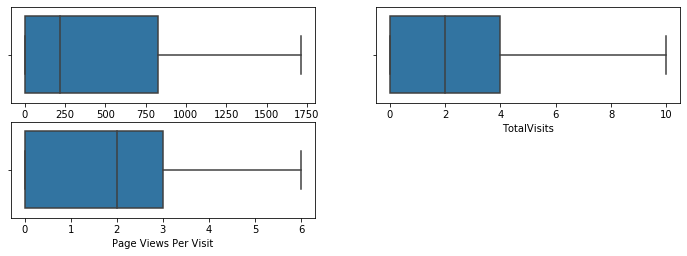

In [40]:
# Check outliers
plt.figure(figsize = (12,6))
var=['Total Time Spent on Website','TotalVisits','Page Views Per Visit']
for i in enumerate(var):
    plt.subplot(3,2,i[0]+1)
    sns.boxplot(x = i[1], data = data)

# EDA

In [41]:
#The Coverted here is a target variable. Indicates whether a lead has been successfully converted or not.

100*data['Converted'].value_counts()/data.shape[0]

0    63.146448
1    36.853552
Name: Converted, dtype: float64

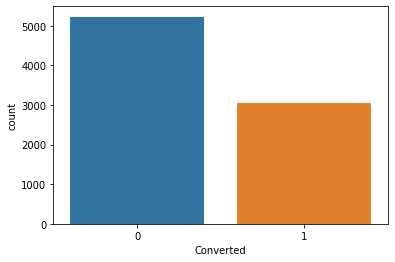

In [42]:
sns.countplot(data['Converted'])

#### As per the Data provided we can see that 63.15% time lead was not converted
#### 36.85% time it was converted successfully.

## Now let's check different variables wrt the Converted Variable 

In [43]:
data.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8276 entries, 0 to 9239
Data columns (total 30 columns):
Prospect ID                                      8276 non-null object
Lead Number                                      8276 non-null int64
Lead Origin                                      8276 non-null object
Lead Source                                      8276 non-null object
Do Not Email                                     8276 non-null object
Do Not Call                                      8276 non-null object
Converted                                        8276 non-null int64
TotalVisits                                      8276 non-null float64
Total Time Spent on Website                      8276 non-null int64
Page Views Per Visit                             8276 non-null float64
Last Activity                                    8276 non-null object
Country                                          8276 non-null object
Specialization                                   8276 

## Let's check all columns wrt Coverted so as to find the important inference to get 80% success rate


# 1. City 

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

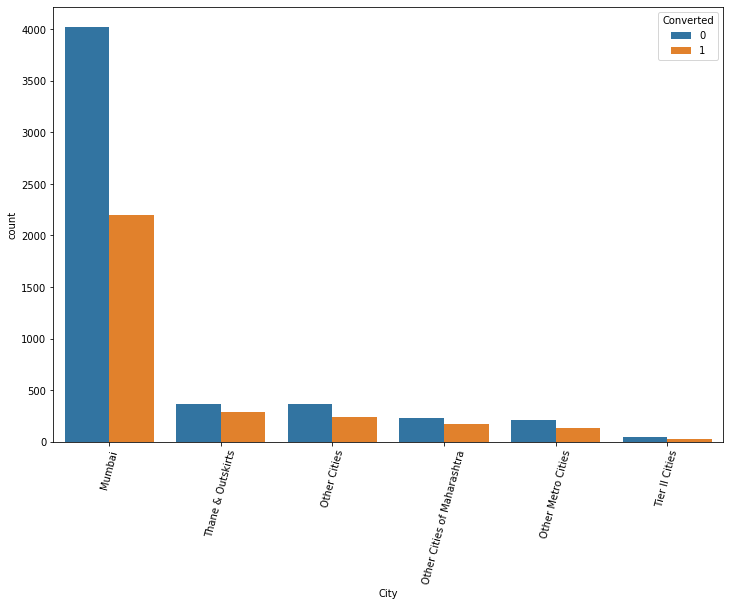

In [45]:
plt.figure(figsize=(12,8))
sns.countplot(x='City',hue='Converted',data=data)
plt.xticks(rotation=75)

### Approx 30% lead is converted in Mumbai 

# 2. Lead Source

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]), <a list of 21 Text xticklabel objects>)

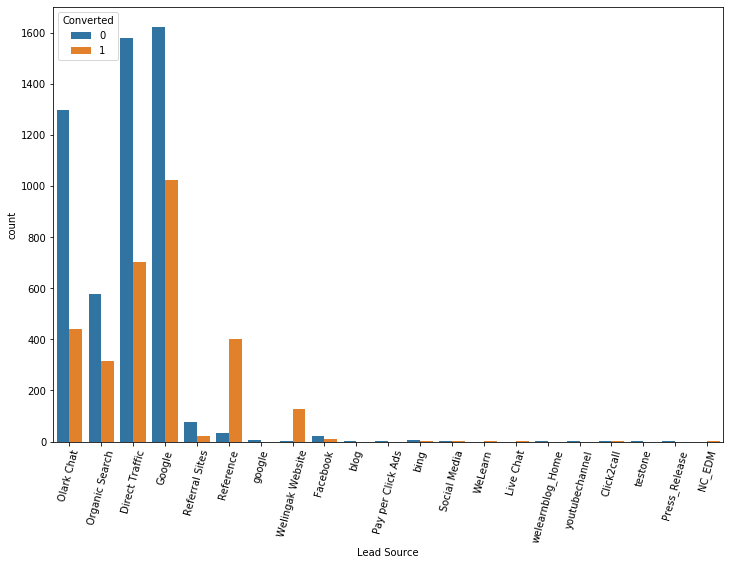

In [46]:
plt.figure(figsize=(12,8))
sns.countplot(x='Lead Source',hue='Converted',data=data)
plt.xticks(rotation=75)

In [47]:
data['Lead Source'].value_counts()

Google               2643
Direct Traffic       2280
Olark Chat           1738
Organic Search        895
Reference             435
Welingak Website      128
Referral Sites        101
Facebook               30
bing                    6
google                  5
Click2call              3
Live Chat               2
Social Media            2
testone                 1
blog                    1
Press_Release           1
youtubechannel          1
WeLearn                 1
Pay per Click Ads       1
NC_EDM                  1
welearnblog_Home        1
Name: Lead Source, dtype: int64

In [48]:
#Source with count less than 10 , replacing their name to others 
data['Lead Source'] = data['Lead Source'].replace('google', 'Google')
data['Lead Source'] = data['Lead Source'].replace(['bing','Click2call','Social Media','Live Chat','youtubechannel','Pay per Click Ads','testone','Press_Release','welearnblog_Home','blog','NC_EDM','WeLearn'],'Others')



(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

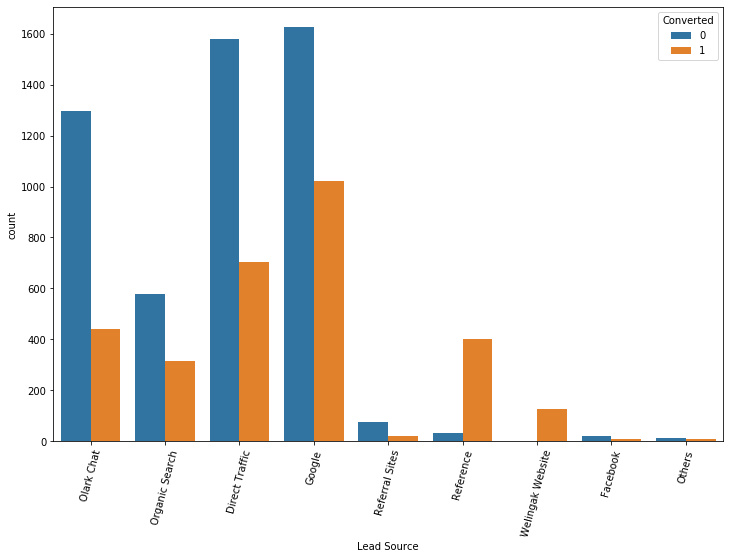

In [49]:
plt.figure(figsize=(12,8))
sns.countplot(x='Lead Source',hue='Converted',data=data)
plt.xticks(rotation=75)

### Amongst the Top sources :
    
#### 1.Olark chat has the conversion rate of approx 25%
#### 2.direct Traffic has the conversion rate of approx 30%
#### 3.Google has the conversion rate of 40%
#### 4.We can see sources with less leads like Reference and Welingak website have good conversion rate.

### As these are the sources with maximum number of sources so should focus on these to have better conversion rate.



# 3. Do not email and Do not call 

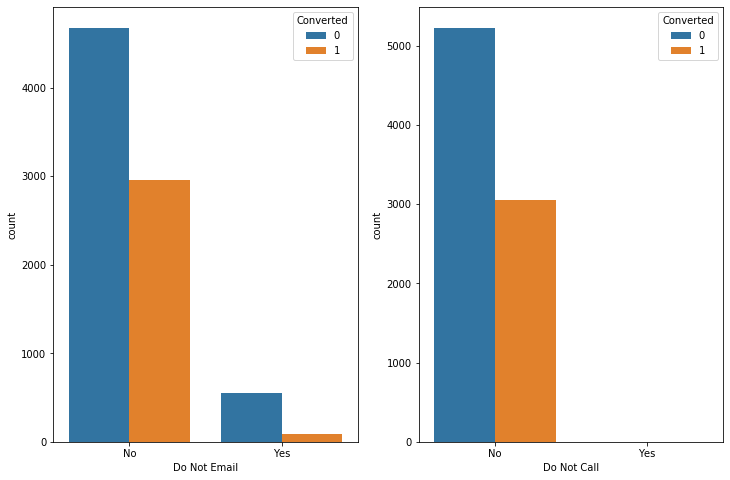

In [50]:
# Impact of Do not email and Do not call on Converted.
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
sns.countplot(x='Do Not Email',hue='Converted',data=data)
plt.subplot(1,2,2)
sns.countplot(x='Do Not Call',hue='Converted',data=data)





#### Nothing conclusive can be said on basis of do not email and do not call.


# 4.Total Visits

In [51]:
data['TotalVisits'].value_counts()

0.0     2161
2.0     1634
3.0     1275
4.0     1085
5.0      763
6.0      452
1.0      386
7.0      180
8.0      137
9.0      117
10.0      86
Name: TotalVisits, dtype: int64

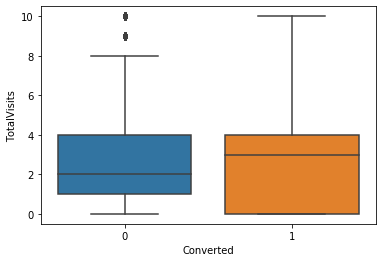

In [52]:
sns.boxplot(y='TotalVisits',x='Converted',data=data)

#### We can see that median of both converted and not converted are quite same.

# 4. Total Time Spent on Website

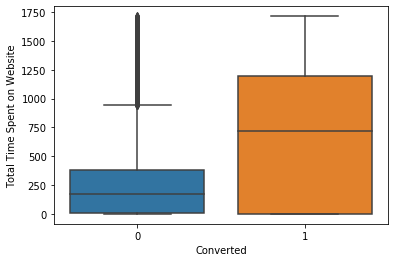

In [53]:

sns.boxplot(y='Total Time Spent on Website',x='Converted',data=data)

#### We can see Median of leads who coverted is 3times to those who were not converted

# 5.Page Views Per Visit

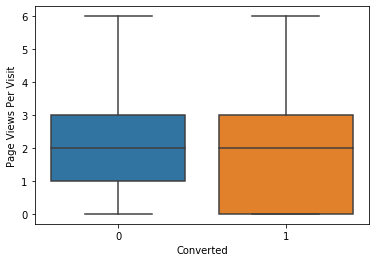

In [54]:
sns.boxplot(y='Page Views Per Visit',x='Converted',data=data)

#### No inference , median of both converted and not converted are same wrt page views per visit

# 6. Last Activity

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text xticklabel objects>)

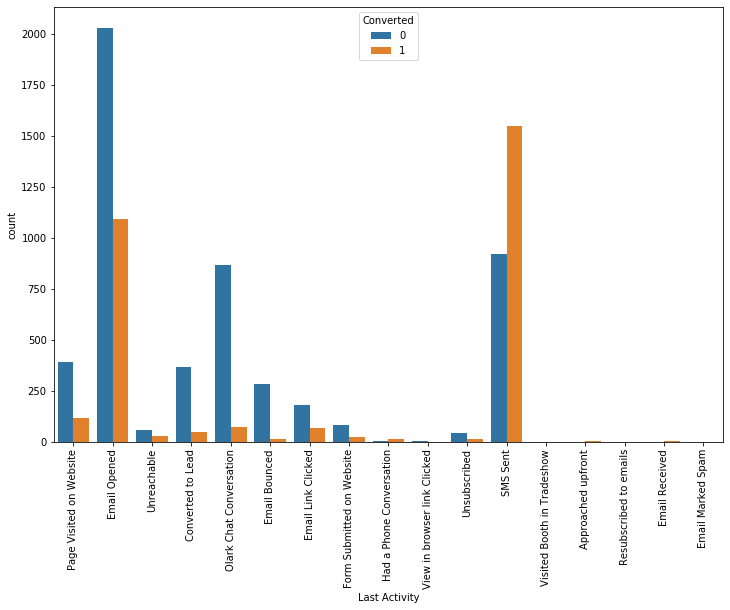

In [55]:
plt.figure(figsize=(12,8))

sns.countplot(x='Last Activity',hue='Converted',data=data)
plt.xticks(rotation=90)

In [56]:
data['Last Activity'].value_counts()

Email Opened                    3121
SMS Sent                        2466
Olark Chat Conversation          937
Page Visited on Website          507
Converted to Lead                416
Email Bounced                    297
Email Link Clicked               250
Form Submitted on Website        109
Unreachable                       84
Unsubscribed                      56
Had a Phone Conversation          19
Approached upfront                 5
View in browser link Clicked       4
Email Received                     2
Email Marked Spam                  1
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [57]:
data['Last Activity'] = data['Last Activity'].replace(['Unreachable','Unsubscribed','Had a Phone Conversation','Approached upfront','View in browser link Clicked','Email Received','Visited Booth in Tradeshow','Email Marked Spam','Resubscribed to emails'],'Others')



(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

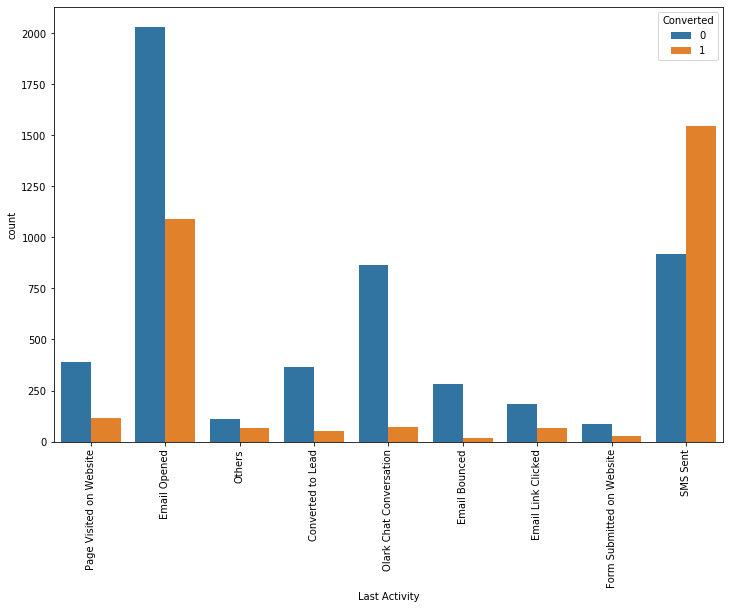

In [58]:
plt.figure(figsize=(12,8))

sns.countplot(x='Last Activity',hue='Converted',data=data)
plt.xticks(rotation=90)

#### 1. maximum leads opened the email with 33% conversion rate
#### 2. Last activity of customer who sent the SMS had the maximum conversion rate i.e. approx 60% 

# 7. Country

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37]), <a list of 38 Text xticklabel objects>)

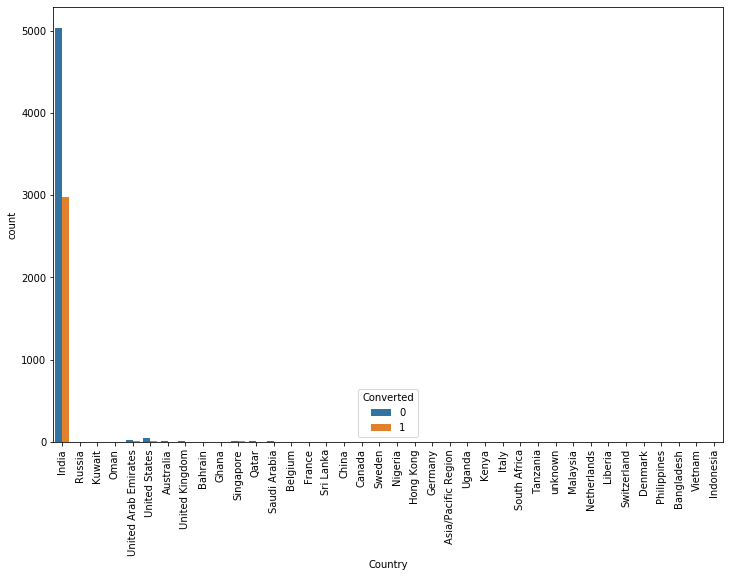

In [59]:
plt.figure(figsize=(12,8))

sns.countplot(x='Country',hue='Converted',data=data)
plt.xticks(rotation=90)

#### not seeing much of inference from it as mostly customer are from India so would be dropping this column.

# 8. Specialization 

In [60]:
data['Specialization'].value_counts()

Others                               3159
Finance Management                    858
Marketing Management                  752
Human Resource Management             746
Operations Management                 458
Business Administration               354
IT Projects Management                327
Supply Chain Management               302
Banking, Investment And Insurance     280
Media and Advertising                 172
Travel and Tourism                    162
International Business                157
Healthcare Management                 132
Hospitality Management                 97
E-COMMERCE                             97
Retail Management                      81
Rural and Agribusiness                 58
E-Business                             49
Services Excellence                    35
Name: Specialization, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]), <a list of 19 Text xticklabel objects>)

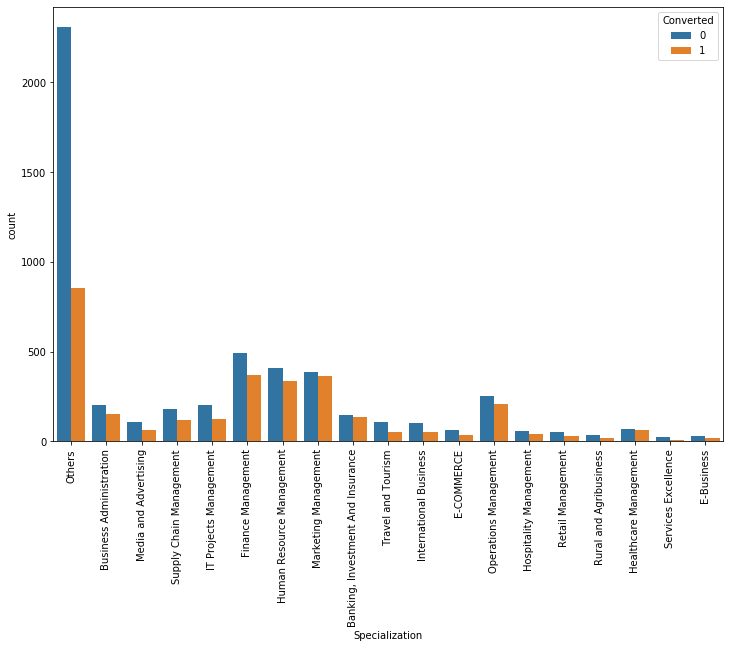

In [61]:
plt.figure(figsize=(12,8))

sns.countplot(x='Specialization',hue='Converted',data=data)
plt.xticks(rotation=90)

 #### Not seeing much inference as majority leads selected other specialisation rather than one which were mentioned.
 
 # 9. What is your current occupation.
    

In [62]:
data['What is your current occupation'].value_counts()

Unemployed              7444
Working Professional     610
Student                  196
Other                     12
Housewife                  9
Businessman                5
Name: What is your current occupation, dtype: int64

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

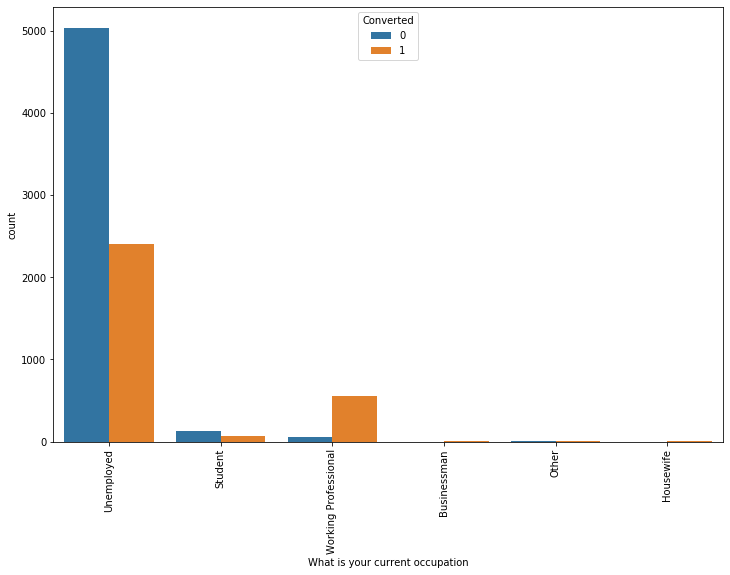

In [63]:
plt.figure(figsize=(12,8))

sns.countplot(x='What is your current occupation',hue='Converted',data=data)
plt.xticks(rotation=90)

#### 1. Maximum leads were unemployed with approx 30% conversion rate
#### 2. Customers who were working professional had a good conversion rate.


# 10. What matters most to you in choosing a course

In [64]:
data['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      8274
Flexibility & Convenience       1
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

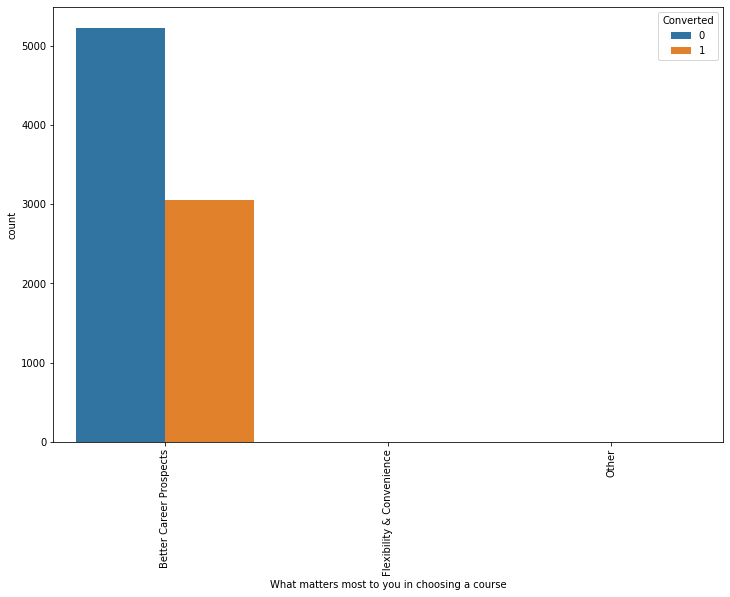

In [65]:
plt.figure(figsize=(12,8))

sns.countplot(x='What matters most to you in choosing a course',hue='Converted',data=data)
plt.xticks(rotation=90)

#### Not much conclusive from this column as majority choosing the course for better career prospects.

# 11.Impact of Search , Magazine,Newspaper Article,X Education Forums,Newspaperand Digital Advertisement on converted

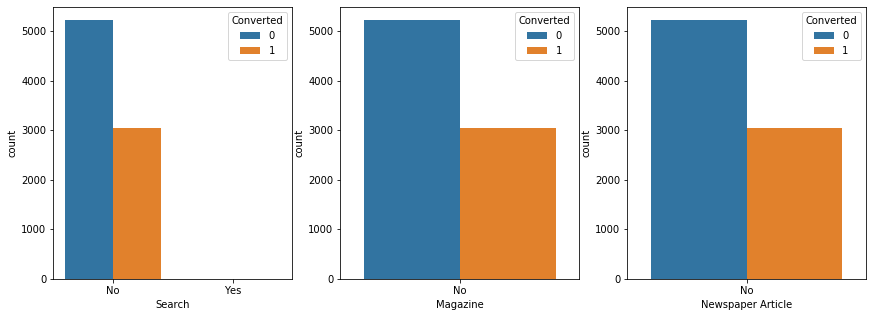

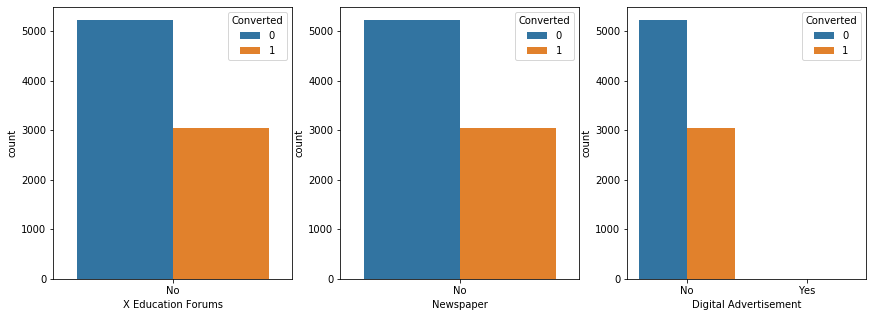

In [66]:

plt.figure(figsize=(30,5))
plt.subplot(1,6,1)
sns.countplot(x='Search',hue='Converted',data=data)
plt.subplot(1,6,2)
sns.countplot(x='Magazine',hue='Converted',data=data)
plt.subplot(1,6,3)
sns.countplot(x='Newspaper Article',hue='Converted',data=data)


plt.figure(figsize=(30,5))
plt.subplot(1,6,1)
sns.countplot(x='X Education Forums',hue='Converted',data=data)
plt.subplot(1,6,2)
sns.countplot(x='Newspaper',hue='Converted',data=data)
plt.subplot(1,6,3)
sns.countplot(x='Digital Advertisement',hue='Converted',data=data)


#### Mostly entries from these columns are NO , so nothing conclusive. 

# 12. Through Recommendations

In [67]:
data['Through Recommendations'].value_counts()

No     8273
Yes       3
Name: Through Recommendations, dtype: int64

#### nothing conclusive , most Entries are No.

# 13. Receive More Updates About Our Courses

In [68]:
data['Receive More Updates About Our Courses'].value_counts()

No    8276
Name: Receive More Updates About Our Courses, dtype: int64

#### nothing conclusive , Entries are only No.

# 14. Tags

In [69]:
data['Tags'].value_counts()

Will revert after reading the email                  4898
Ringing                                              1070
Interested in other courses                           468
Already a student                                     444
Closed by Horizzon                                    257
switched off                                          222
Busy                                                  160
Lost to EINS                                          153
Not doing further education                           132
Interested  in full time MBA                          106
Graduation in progress                                102
invalid number                                         70
Diploma holder (Not Eligible)                          60
wrong number given                                     39
opp hangup                                             29
number not provided                                    23
in touch with EINS                                     11
Lost to Others

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 <a list of 26 Text xticklabel objects>)

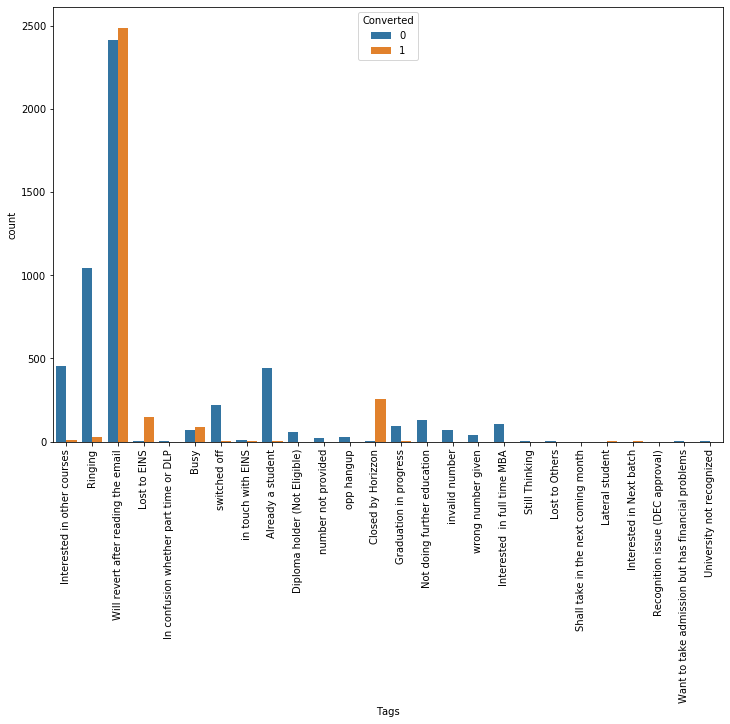

In [70]:
plt.figure(figsize=(12,8))

sns.countplot(x='Tags',hue='Converted',data=data)
plt.xticks(rotation=90)

In [71]:
# Replacing all tags with count less than 100 counts as other tags

data['Tags']=data['Tags'].replace(['invalid number','Diploma holder (Not Eligible)','wrong number given','opp hangup','number not provided','in touch with EINS','Lost to Others','Still Thinking','In confusion whether part time or DLP','Lateral student','Interested in Next batch','Want to take admission but has financial problems','University not recognized','Shall take in the next coming month','Recognition issue (DEC approval)'],'Other Tags')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

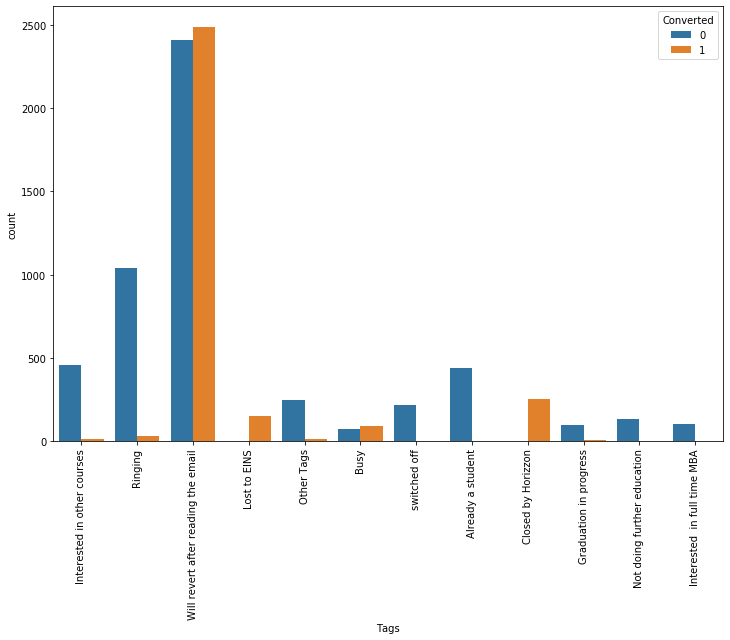

In [72]:
plt.figure(figsize=(12,8))

sns.countplot(x='Tags',hue='Converted',data=data)
plt.xticks(rotation=90)

#### 1. highest leads with good conversion had a tag of will revert after reading the email
#### 2. other good conversion tags are closed by horizon and lost to eins

# 15.Update me on Supply Chain Content

In [73]:
data['Update me on Supply Chain Content'].value_counts()

No    8276
Name: Update me on Supply Chain Content, dtype: int64

#### nothing conclusive , entries are No only

# 16.Get updates on DM Content

In [74]:
data['Get updates on DM Content'].value_counts()

No    8276
Name: Get updates on DM Content, dtype: int64

####  nothing conclusive , entries are No only

# 17.I agree to pay the amount through cheque

In [75]:
data['I agree to pay the amount through cheque'].value_counts()

No    8276
Name: I agree to pay the amount through cheque, dtype: int64

#### nothing conclusive , entries are No only

# 18.A free copy of Mastering The Interview

In [76]:
data['A free copy of Mastering The Interview'].value_counts()

No     5806
Yes    2470
Name: A free copy of Mastering The Interview, dtype: int64

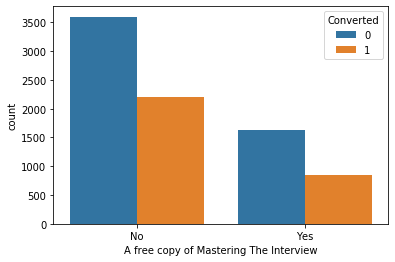

In [77]:
sns.countplot(x='A free copy of Mastering The Interview',hue='Converted',data=data)


# 19. Last Notable Activity

In [78]:
data['Last Notable Activity'].value_counts()

Modified                        3061
Email Opened                    2556
SMS Sent                        1952
Page Visited on Website          234
Olark Chat Conversation          170
Email Link Clicked               158
Email Bounced                     58
Unsubscribed                      42
Unreachable                       30
Had a Phone Conversation           9
Approached upfront                 1
View in browser link Clicked       1
Form Submitted on Website          1
Email Marked Spam                  1
Email Received                     1
Resubscribed to emails             1
Name: Last Notable Activity, dtype: int64

In [79]:
data['Last Notable Activity']=data['Last Notable Activity'].replace(['Had a Phone Conversation','Approached upfront','Email Received','Resubscribed to emails','Email Marked Spam','Form Submitted on Website','View in browser link Clicked'],'Other Acitivities')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

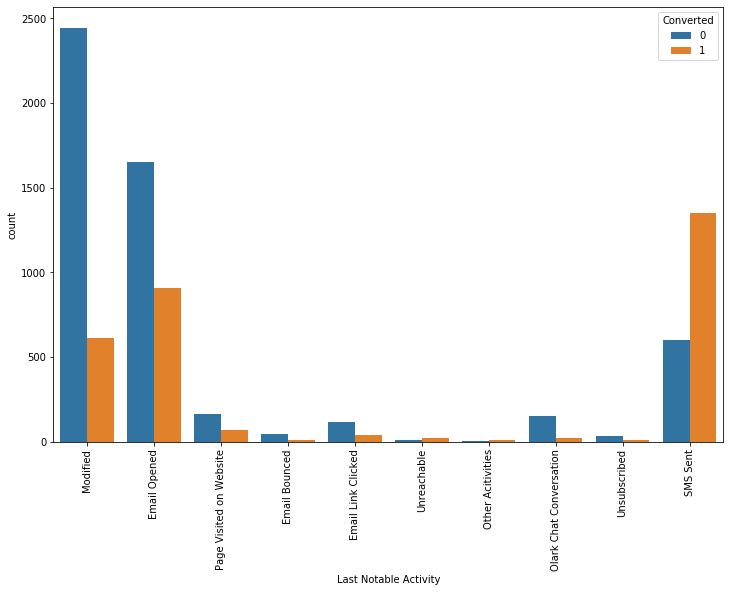

In [80]:
plt.figure(figsize=(12,8))
sns.countplot(x='Last Notable Activity', hue='Converted', data=data)
plt.xticks(rotation=90)


#### 1.Activities of leads with good conversion is sms sent 
#### 2.Highest leads activities were modified and email opened.

## Dropping the columns which are skewed or not showing anything conclusive 

In [81]:
data.drop(['Lead Number','What matters most to you in choosing a course','Search','Magazine','Newspaper Article','X Education Forums','Newspaper',
           'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content',
           'Get updates on DM Content','I agree to pay the amount through cheque','A free copy of Mastering The Interview','Country'],axis=1,inplace=True)

In [82]:
data.shape

(8276, 15)

In [83]:
data.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,City,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,Interested in other courses,Mumbai,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Others,Unemployed,Ringing,Mumbai,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Mumbai,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Others,Media and Advertising,Unemployed,Ringing,Mumbai,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,Will revert after reading the email,Mumbai,Modified


### Converting some binary variables (Yes/No) to 0/1

In [84]:
# List of variables to map

varlist =  ['Do Not Email', 'Do Not Call']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
data[varlist] = data[varlist].apply(binary_map)

In [85]:
data.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,City,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,Interested in other courses,Mumbai,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,Others,Unemployed,Ringing,Mumbai,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Mumbai,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Others,Media and Advertising,Unemployed,Ringing,Mumbai,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,Will revert after reading the email,Mumbai,Modified


### For categorical variables with multiple levels, creating dummy features (one-hot encoded)

In [86]:
 ##Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(data[['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation','Tags','City','Last Notable Activity']],drop_first=True)

#Adding the results to the master dataframe
data = pd.concat([data, dummy1], axis=1)

In [87]:
data.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,City,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Graduation in progress,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Other Tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other Acitivities,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,Interested in other courses,Mumbai,Modified,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,Others,Unemployed,Ringing,Mumbai,Email Opened,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Mumbai,Email Opened,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Others,Media and Advertising,Unemployed,Ringing,Mumbai,Modified,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,Will revert after reading the email,Mumbai,Modified,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


### Dropping the repeated variables¶


In [88]:
data.drop(['Lead Origin','Lead Source','Last Activity','Specialization','What is your current occupation','Tags','City','Last Notable Activity'],axis=1,inplace=True)

In [89]:
data.columns

Index(['Prospect ID', 'Do Not Email', 'Do Not Call', 'Converted',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Facebook', 'Lead Source_Google',
       'Lead Source_Olark Chat', 'Lead Source_Organic Search',
       'Lead Source_Others', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Lead Source_Welingak Website',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Opened', 'Last Activity_Form Submitted on Website',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Others',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specializa

In [90]:
data.shape

(8276, 74)

# Test-Train Split

In [91]:
from sklearn.model_selection import train_test_split

In [92]:
# Putting feature variable to X
X = data.drop(['Prospect ID','Converted'], axis=1)

X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Graduation in progress,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Other Tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other Acitivities,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
0,0,0,0.0,0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,0,0,2.0,1532,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,0,0,2.0,1428,1.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [93]:
# Putting response variable to y
y = data['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [94]:
 #Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

# Feature Scaling

In [95]:
from sklearn.preprocessing import StandardScaler

In [96]:
scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Graduation in progress,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Other Tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other Acitivities,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
4403,0,0,-1.176922,-0.870610,-1.245141,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
653,0,0,0.553292,-0.452416,1.159956,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1828,0,0,2.283506,-0.330688,1.159956,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
749,0,0,0.985845,2.392479,0.258044,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4482,0,0,0.120739,-0.854903,-0.343230,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


### Checking the Lead Conversion Rate

In [97]:
### Checking the converted Rate
converted = (sum(data['Converted'])/len(data['Converted'].index))*100
converted

36.853552440792654

#### We have almost 37% lead conversion rate

# Model Building

#### Let's start by splitting our data into a training set and a test set.

In [98]:
import statsmodels.api as sm

In [99]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5793
Model:                            GLM   Df Residuals:                     5721
Model Family:                Binomial   Df Model:                           71
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 02 Mar 2020   Deviance:                          nan
Time:                        18:27:33   Pearson chi2:                 3.43e+18
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                -1.873e+15   4.18e+07  -4.49e+07      0.000   -1.87e+15   -1.87e+15
Do Not Email                                          -3.64e+14   4.84e+06  -7.52e+07      0.000   -3.64e+14   -3.64e+14
Do Not Call                                           4.646e+14   6.78e+07   6.85e+06      0.000    4.65e+14    4.65e+14
TotalVisits                                           5.279e+13   1.56e+06   3.39e+07      0.000    5.28e+13    5.28e+13
Total Time Spent on Website                           4.917e+14   1.07e+06    4.6e+08      0.000    4.92e+14    4.92e+14
Page Views Per Visit                                 -1.093e+14   1.69e+06  -6.49e+07      0.000   -1.09e+14   -1.09e+14
Lead Origin_Landing Page Submission                  -2.977e+14   3.66e+06  -8.14e+07      0.000   -2.98e+14   -2.98e+14
Lead Origin_Lead Add Form                             1.713e+14   3.97e+07   4.32e+06      0.000    1.71e+14    1.71e+14
Lead Origin_Lead Import                               3.019e+14   7.83e+06   3.86e+07      0.000    3.02e+14    3.02e+14
Lead Source_Facebook                                  3.019e+14   7.83e+06   3.86e+07      0.000    3.02e+14    3.02e+14
Lead Source_Google                                    9.951e+13   2.65e+06   3.75e+07      0.000    9.95e+13    9.95e+13
Lead Source_Olark Chat                               -1.189e+14    4.2e+06  -2.83e+07      0.000   -1.19e+14   -1.19e+14
Lead Source_Organic Search                            1.228e+14   3.57e+06   3.44e+07      0.000    1.23e+14    1.23e+14
Lead Source_Others                                    3.537e+14   2.18e+07   1.63e+07      0.000    3.54e+14    3.54e+14
Lead Source_Reference                                 7.783e+14   3.98e+07   1.95e+07      0.000    7.78e+14    7.78e+14
Lead Source_Referral Sites                            3.983e+13   8.47e+06    4.7e+06      0.000    3.98e+13    3.98e+13
Lead Source_Welingak Website                          1.049e+15   4.03e+07    2.6e+07      0.000    1.05e+15    1.05e+15
Last Activity_Email Bounced                          -2.698e+14   8.02e+06  -3.36e+07      0.000    -2.7e+14    -2.7e+14
Last Activity_Email Link Clicked                      -2.78e+14   9.51e+06  -2.92e+07      0.000   -2.78e+14   -2.78e+14
Last Activity_Email Opened                            3.931e+13   5.33e+06   7.38e+06      0.000    3.93e+13    3.93e+13
Last Activity_Form Submitted on Website              -3.058e+14   8.76e+06  -3.49e+07      0.000   -3.06e+14   -3.06e+14
Last Activity_Olark Chat Conversation                 4.513e+13   5.24e+06    8.6e+06      0.000    4.51e+13    4.51e+13
Last Activity_Others                                 -2.93

In [100]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

## Feature Selection Using RFE

In [101]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [102]:
rfe.support_

array([ True, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
        True,  True,  True,  True, False,  True,  True,  True, False,
       False,  True,  True,  True, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False])

In [103]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 56),
 ('TotalVisits', False, 44),
 ('Total Time Spent on Website', False, 6),
 ('Page Views Per Visit', False, 40),
 ('Lead Origin_Landing Page Submission', False, 2),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 17),
 ('Lead Source_Facebook', False, 10),
 ('Lead Source_Google', False, 39),
 ('Lead Source_Olark Chat', False, 11),
 ('Lead Source_Organic Search', False, 38),
 ('Lead Source_Others', False, 22),
 ('Lead Source_Reference', False, 9),
 ('Lead Source_Referral Sites', False, 54),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', False, 28),
 ('Last Activity_Email Link Clicked', False, 31),
 ('Last Activity_Email Opened', False, 34),
 ('Last Activity_Form Submitted on Website', False, 30),
 ('Last Activity_Olark Chat Conversation', False, 8),
 ('Last Activity_Others', False, 12),
 ('Last Activity_Page Visited on Website', False, 43),
 ('Last Activity_SMS Sent', False, 

In [104]:
col = X_train.columns[rfe.support_]

In [105]:
X_train.columns[~rfe.support_]

Index(['Do Not Call', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Import', 'Lead Source_Facebook', 'Lead Source_Google',
       'Lead Source_Olark Chat', 'Lead Source_Organic Search',
       'Lead Source_Others', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Last Activity_Email Bounced',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Opened',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Others',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Hospitality Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Proje

### Assessing the model with StatsModels

In [106]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5793
Model:                            GLM   Df Residuals:                     5777
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1767.8
Date:                Mon, 02 Mar 2020   Deviance:                       3535.6
Time:                        18:27:34   Pearson chi2:                 8.69e+03
No. Iterations:                    23                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.7494      0.387     -7.106      0.000      -3.508      -1.991
Do Not Email                                            -1.5684      0.201     -7.809      0.000      -1.962      -1.175
Lead Origin_Lead Add Form                                2.5078      0.313      8.014      0.000       1.894       3.121
Lead Source_Welingak Website                             1.8847      0.800      2.356      0.018       0.317       3.452
Specialization_Others                                   -0.9125      0.087    -10.454      0.000      -1.084      -0.741
What is your current occupation_Unemployed              -1.6416      0.329     -4.991      0.000      -2.286      -0.997
What is your current occupation_Working Professional     1.4379      0.428      3.363      0.001       0.600       2.276
Tags_Busy                                                3.6665      0.376      9.749      0.000       2.929       4.404
Tags_Closed by Horizzon                                  8.9832      1.049      8.563      0.000       6.927      11.039
Tags_Interested  in full time MBA                      -20.6273    1.4e+04     -0.001      0.999   -2.74e+04    2.74e+04
Tags_Interested in other courses                        -0.6013      0.624     -0.963      0.335      -1.825       0.622
Tags_Lost to EINS                                        8.5081      0.778     10.939      0.000       6.984      10.033
Tags_Ringing                                            -1.0987      0.396     -2.776      0.006      -1.874      -0.323
Tags_Will revert after reading the email                 3.9941      0.293     13.633      0.000       3.420       4.568
Tags_switched off                                       -2.1694      1.051     -2.064      0.039      -4.229      -0.110
Last Notable Activity_SMS Sent                           2.7644      0.118     23.527      0.000       2.534       2.995
========================================================================================================================
"""

In [107]:
col=col.drop([ 'Tags_Interested  in full time MBA'],1) # High P value , so removing it 

In [108]:
col

Index(['Do Not Email', 'Lead Origin_Lead Add Form',
       'Lead Source_Welingak Website', 'Specialization_Others',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Interested in other courses',
       'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_switched off',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

### Assessing the model :2

In [109]:
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5793
Model:                            GLM   Df Residuals:                     5778
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1769.3
Date:                Mon, 02 Mar 2020   Deviance:                       3538.7
Time:                        18:27:34   Pearson chi2:                 8.87e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.8588      0.387     -7.393      0.000      -3.617      -2.101
Do Not Email                                            -1.5659      0.201     -7.795      0.000      -1.960      -1.172
Lead Origin_Lead Add Form                                2.5099      0.313      8.011      0.000       1.896       3.124
Lead Source_Welingak Website                             1.8818      0.800      2.352      0.019       0.314       3.450
Specialization_Others                                   -0.9128      0.087    -10.449      0.000      -1.084      -0.742
What is your current occupation_Unemployed              -1.6432      0.329     -4.993      0.000      -2.288      -0.998
What is your current occupation_Working Professional     1.4005      0.422      3.315      0.001       0.573       2.228
Tags_Busy                                                3.7753      0.376     10.044      0.000       3.039       4.512
Tags_Closed by Horizzon                                  9.0946      1.049      8.672      0.000       7.039      11.150
Tags_Interested in other courses                        -0.4755      0.621     -0.766      0.444      -1.693       0.742
Tags_Lost to EINS                                        8.6190      0.777     11.086      0.000       7.095      10.143
Tags_Ringing                                            -0.9921      0.396     -2.506      0.012      -1.768      -0.216
Tags_Will revert after reading the email                 4.1049      0.292     14.050      0.000       3.532       4.678
Tags_switched off                                       -2.0634      1.051     -1.963      0.050      -4.123      -0.004
Last Notable Activity_SMS Sent                           2.7704      0.118     23.528      0.000       2.540       3.001
========================================================================================================================
"""

In [110]:
col=col.drop([       'Tags_Interested in other courses'],1)  # High P value so removing it

In [111]:
col

Index(['Do Not Email', 'Lead Origin_Lead Add Form',
       'Lead Source_Welingak Website', 'Specialization_Others',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_switched off',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

### Assessing the model :3

In [112]:
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5793
Model:                            GLM   Df Residuals:                     5779
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1769.6
Date:                Mon, 02 Mar 2020   Deviance:                       3539.3
Time:                        18:27:34   Pearson chi2:                 8.94e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.9520      0.376     -7.842      0.000      -3.690      -2.214
Do Not Email                                            -1.5637      0.201     -7.783      0.000      -1.957      -1.170
Lead Origin_Lead Add Form                                2.4986      0.312      8.005      0.000       1.887       3.110
Lead Source_Welingak Website                             1.8928      0.800      2.367      0.018       0.326       3.460
Specialization_Others                                   -0.9138      0.087    -10.458      0.000      -1.085      -0.743
What is your current occupation_Unemployed              -1.6632      0.331     -5.026      0.000      -2.312      -1.015
What is your current occupation_Working Professional     1.3506      0.418      3.233      0.001       0.532       2.169
Tags_Busy                                                3.8867      0.355     10.951      0.000       3.191       4.582
Tags_Closed by Horizzon                                  9.2092      1.041      8.848      0.000       7.169      11.249
Tags_Lost to EINS                                        8.7323      0.767     11.384      0.000       7.229      10.236
Tags_Ringing                                            -0.8804      0.376     -2.342      0.019      -1.617      -0.144
Tags_Will revert after reading the email                 4.2182      0.263     16.024      0.000       3.702       4.734
Tags_switched off                                       -1.9542      1.044     -1.872      0.061      -4.001       0.092
Last Notable Activity_SMS Sent                           2.7752      0.118     23.552      0.000       2.544       3.006
========================================================================================================================
"""

In [113]:
col

Index(['Do Not Email', 'Lead Origin_Lead Add Form',
       'Lead Source_Welingak Website', 'Specialization_Others',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_switched off',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

In [114]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

4403    0.977353
653     0.003954
1828    0.009803
749     0.003954
4482    0.812207
2857    0.402031
2946    0.812207
9012    0.002069
7771    0.009803
5597    0.402031
dtype: float64

In [115]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.97735274, 0.00395448, 0.00980344, 0.00395448, 0.81220696,
       0.40203074, 0.81220696, 0.00206852, 0.00980344, 0.40203074])

In [116]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,1,0.977353,4403
1,0,0.003954,653
2,0,0.009803,1828
3,0,0.003954,749
4,1,0.812207,4482


In [117]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted
0,1,0.977353,4403,1
1,0,0.003954,653,0
2,0,0.009803,1828,0
3,0,0.003954,749,0
4,1,0.812207,4482,1


### Checking Confusion matrix

In [118]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3505  114]
 [ 656 1518]]


In [119]:
 # Predicted      not_churn    churn
 # Actual
 # not_churn     3505          114
 # churn          656             1518

In [120]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8670809597790436


### Checking VIFs

In [121]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [122]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,What is your current occupation_Unemployed,5.76
10,Tags_Will revert after reading the email,4.47
9,Tags_Ringing,1.79
3,Specialization_Others,1.76
1,Lead Origin_Lead Add Form,1.63
5,What is your current occupation_Working Profes...,1.57
12,Last Notable Activity_SMS Sent,1.50
2,Lead Source_Welingak Website,1.35
7,Tags_Closed by Horizzon,1.33
11,Tags_switched off,1.16


In [123]:
col=col.drop(['What is your current occupation_Unemployed'],1) # High Vif so removing it 

### Assessing the model :4

In [124]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5793
Model:                            GLM   Df Residuals:                     5780
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1783.4
Date:                Mon, 02 Mar 2020   Deviance:                       3566.8
Time:                        18:27:35   Pearson chi2:                 8.67e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -4.4554      0.260    -17.112      0.000      -4.966      -3.945
Do Not Email                                            -1.5583      0.200     -7.783      0.000      -1.951      -1.166
Lead Origin_Lead Add Form                                2.5489      0.307      8.298      0.000       1.947       3.151
Lead Source_Welingak Website                             1.8251      0.798      2.288      0.022       0.262       3.388
Specialization_Others                                   -0.9417      0.087    -10.820      0.000      -1.112      -0.771
What is your current occupation_Working Professional     2.9468      0.273     10.790      0.000       2.412       3.482
Tags_Busy                                                3.7366      0.352     10.608      0.000       3.046       4.427
Tags_Closed by Horizzon                                  9.0678      1.040      8.718      0.000       7.029      11.106
Tags_Lost to EINS                                        8.6052      0.766     11.232      0.000       7.104      10.107
Tags_Ringing                                            -1.0248      0.373     -2.745      0.006      -1.757      -0.293
Tags_Will revert after reading the email                 4.1027      0.261     15.702      0.000       3.591       4.615
Tags_switched off                                       -2.0938      1.043     -2.007      0.045      -4.138      -0.049
Last Notable Activity_SMS Sent                           2.7603      0.117     23.559      0.000       2.531       2.990
========================================================================================================================
"""

In [125]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [126]:
y_train_pred[:10]

array([0.89991073, 0.00450953, 0.01148244, 0.00450953, 0.81244348,
       0.41272561, 0.81244348, 0.00243918, 0.01148244, 0.41272561])

In [127]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,1,0.899911,4403
1,0,0.004510,653
2,0,0.011482,1828
3,0,0.004510,749
4,1,0.812443,4482


In [128]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted
0,1,0.899911,4403,1
1,0,0.004510,653,0
2,0,0.011482,1828,0
3,0,0.004510,749,0
4,1,0.812443,4482,1


In [129]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3510  109]
 [ 683 1491]]


In [130]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8632832729155878


### checking VIFs

In [131]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,Tags_Will revert after reading the email,1.97
1,Lead Origin_Lead Add Form,1.62
3,Specialization_Others,1.57
11,Last Notable Activity_SMS Sent,1.50
2,Lead Source_Welingak Website,1.35
4,What is your current occupation_Working Profes...,1.24
6,Tags_Closed by Horizzon,1.17
8,Tags_Ringing,1.14
0,Do Not Email,1.05
10,Tags_switched off,1.04


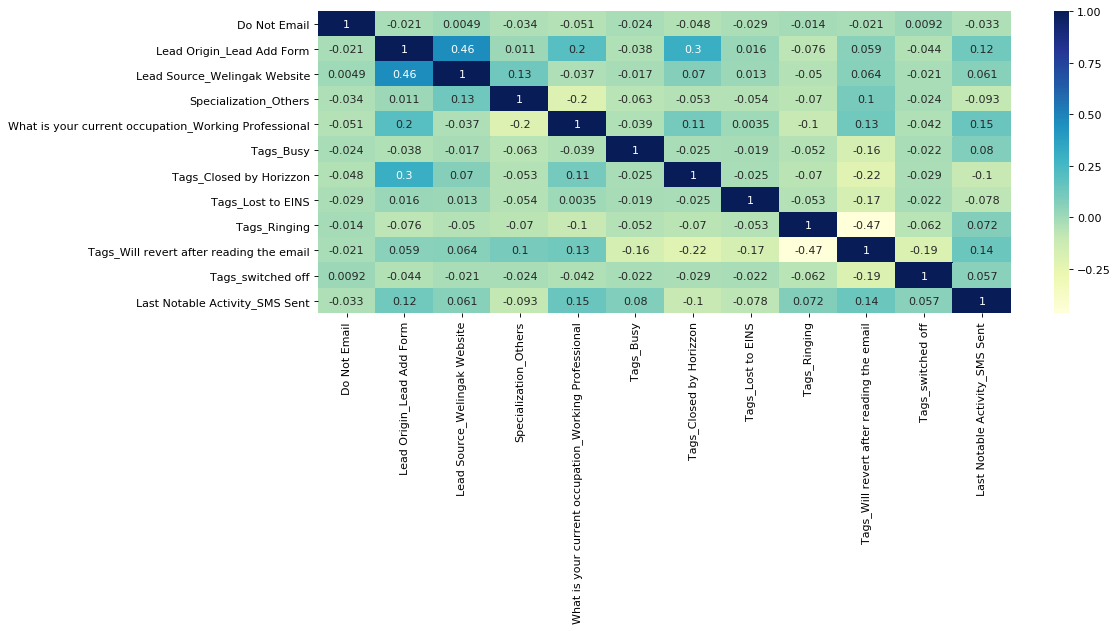

In [132]:
# Slightly alter the figure size to make it more horizontal.
plt.figure(figsize=(15,8), dpi=80, facecolor='w', edgecolor='k', frameon='True')

cor = X_train[col].corr()
sns.heatmap(cor, annot=True, cmap="YlGnBu")

plt.tight_layout()
plt.show()

#### So now our model have variables with p value less than 0.05 and low vif. 


### Calculating Metrics beyond Accuracy

In [133]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [134]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6858325666973321

In [135]:
# Let us calculate specificity
TN / float(TN+FP)

0.9698811826471401

In [136]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.030118817352859907


In [137]:
# positive predictive value 
print (TP / float(TP+FP))

0.931875


In [138]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8371094681612211


# Plotting the ROC Curve
### An ROC curve demonstrates several things:

1.It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).

2.The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.

3.The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [139]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [140]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

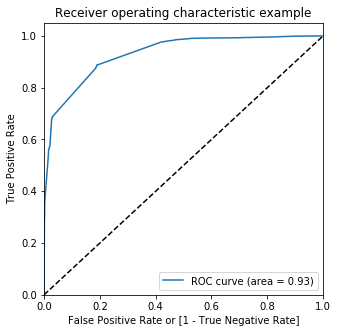

In [141]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)


#### area under the curve is 0.93


## Finding Optimal Cutoff Point
Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [142]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.899911,4403,1,1,1,1,1,1,1,1,1,1,0
1,0,0.004510,653,0,1,0,0,0,0,0,0,0,0,0
2,0,0.011482,1828,0,1,0,0,0,0,0,0,0,0,0
3,0,0.004510,749,0,1,0,0,0,0,0,0,0,0,0
4,1,0.812443,4482,1,1,1,1,1,1,1,1,1,1,0


In [143]:

# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.375281  1.000000  0.000000
0.1   0.1  0.701882  0.983901  0.532468
0.2   0.2  0.727775  0.977461  0.577784
0.3   0.3  0.839634  0.888224  0.810445
0.4   0.4  0.837735  0.875345  0.815142
0.5   0.5  0.863283  0.685833  0.969881
0.6   0.6  0.863456  0.685833  0.970158
0.7   0.7  0.863456  0.684913  0.970710
0.8   0.8  0.860349  0.672493  0.973197
0.9   0.9  0.817366  0.539098  0.984526


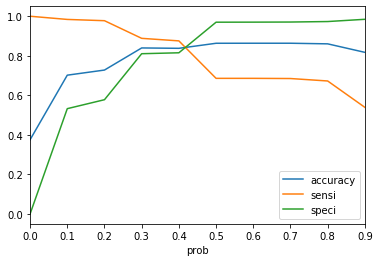

In [144]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])

plt.show()

#### From the curve above, 0.4 is the optimum point to take it as a cutoff probability.

In [145]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.4 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.899911,4403,1,1,1,1,1,1,1,1,1,1,0
1,0,0.004510,653,0,1,0,0,0,0,0,0,0,0,0
2,0,0.011482,1828,0,1,0,0,0,0,0,0,0,0,0
3,0,0.004510,749,0,1,0,0,0,0,0,0,0,0,0
4,1,0.812443,4482,1,1,1,1,1,1,1,1,1,1,0


In [146]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8377351976523391


In [147]:
from sklearn import metrics

# Confusion matrix 
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion2)

[[2950  669]
 [ 271 1903]]


In [148]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [149]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.875344986200552

In [150]:
# Let us calculate specificity
TN / float(TN+FP)

0.8151423045040066

In [151]:
# Calculate false postive rate - predicting converted when customer does not have churned
print(FP/ float(TN+FP))

0.18485769549599337


In [152]:
# positive predictive value 
print (TP / float(TP+FP))

0.7398911353032659


In [153]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9158646383110836


In [154]:
#Looking at the confusion matrix again

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[2950,  669],
       [ 271, 1903]], dtype=int64)

## Precision and Recall

In [155]:
##### Precision
TP / TP + FP

precision=confusion[1,1]/(confusion[0,1]+confusion[1,1])
precision

0.7398911353032659

In [156]:
##### Recall
TP / TP + FN

recall=confusion[1,1]/(confusion[1,0]+confusion[1,1])
recall

0.875344986200552

In [157]:
from sklearn.metrics import precision_score, recall_score


In [158]:
precision_score(y_train_pred_final.Converted , y_train_pred_final.predicted)


0.7398911353032659

In [159]:
from sklearn.metrics import precision_recall_curve


In [160]:
y_train_pred_final.Converted, y_train_pred_final.predicted


(0       1
 1       0
 2       0
 3       0
 4       1
 5       1
 6       1
 7       0
 8       0
 9       1
 10      0
 11      1
 12      0
 13      0
 14      1
 15      0
 16      0
 17      0
 18      0
 19      0
 20      1
 21      0
 22      0
 23      0
 24      0
 25      0
 26      0
 27      1
 28      0
 29      0
 30      0
 31      0
 32      0
 33      1
 34      0
 35      1
 36      0
 37      0
 38      0
 39      0
 40      0
 41      0
 42      0
 43      1
 44      1
 45      0
 46      1
 47      0
 48      0
 49      0
        ..
 5743    0
 5744    0
 5745    1
 5746    1
 5747    0
 5748    0
 5749    0
 5750    0
 5751    1
 5752    1
 5753    1
 5754    1
 5755    0
 5756    0
 5757    1
 5758    0
 5759    0
 5760    1
 5761    1
 5762    0
 5763    0
 5764    1
 5765    0
 5766    1
 5767    1
 5768    0
 5769    0
 5770    1
 5771    0
 5772    0
 5773    0
 5774    0
 5775    1
 5776    0
 5777    1
 5778    0
 5779    0
 5780    0
 5781    1
 5782    0

In [161]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)


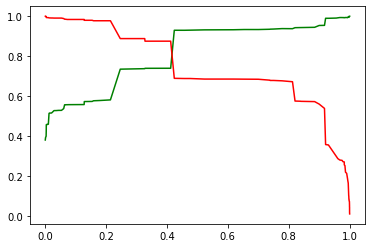

In [162]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [163]:
## precisoon recall trade off suggesting the same cut off that is 0.4

In [164]:
F1 = 2*(precision*recall)/(precision+recall)
F1

0.8019384745048462

## Making prediction on Test data

In [165]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Graduation in progress,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Other Tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other Acitivities,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
4403,0,0,-1.176922,-0.870610,-1.245141,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
653,0,0,0.553292,-0.452416,1.159956,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1828,0,0,2.283506,-0.330688,1.159956,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
749,0,0,0.985845,2.392479,0.258044,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4482,0,0,0.120739,-0.854903,-0.343230,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [166]:
X_test = X_test[col]
X_test.head()

,Do Not Email,Lead Origin_Lead Add Form,Lead Source_Welingak Website,Specialization_Others,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Lost to EINS,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,Last Notable Activity_SMS Sent
8910,1,0,0,0,0,0,0,0,1,0,0,0
2948,0,0,0,1,0,0,0,0,0,1,0,0
1067,0,0,0,0,0,0,0,0,0,1,0,0
5047,0,0,0,0,0,0,0,0,0,1,0,0
1010,1,0,0,0,0,0,0,0,0,1,0,0


In [167]:
X_test_sm = sm.add_constant(X_test)



In [168]:
y_test_pred = res.predict(X_test_sm)


In [169]:
y_test_pred[:10]


8910    0.000877
2948    0.215115
1067    0.412726
5047    0.412726
1010    0.128872
5731    0.412726
5708    0.128872
3855    0.215115
7084    0.412726
6856    0.750233
dtype: float64

In [170]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [171]:
# Let's see the head
y_pred_1.head()

,0
8910,0.000877
2948,0.215115
1067,0.412726
5047,0.412726
1010,0.128872


In [172]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [173]:
# Putting CustID to index
y_test_df['Prospect ID'] = y_test_df.index

In [174]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [175]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [176]:
y_pred_final.head()


,Converted,Prospect ID,0
0,0,8910,0.000877
1,0,2948,0.215115
2,1,1067,0.412726
3,0,5047,0.412726
4,1,1010,0.128872


In [177]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [178]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex_axis(['Prospect ID','Converted','Converted_prob'], axis=1)

In [179]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Prospect ID,Converted,Converted_prob
0,8910,0,0.000877
1,2948,0,0.215115
2,1067,1,0.412726
3,5047,0,0.412726
4,1010,1,0.128872


### Using the probability threshold value 0f 0.4 on the test dataset to predict if a lead will convert¶


In [180]:
y_pred_final['predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.4 else 0)


In [181]:
y_pred_final.head()


,Prospect ID,Converted,Converted_prob,predicted
0,8910,0,0.000877,0
1,2948,0,0.215115,0
2,1067,1,0.412726,1
3,5047,0,0.412726,1
4,1010,1,0.128872,0


In [182]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.predicted)

0.8312525171163915

In [183]:
confusion_test = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.predicted )
confusion_test

array([[1303,  304],
       [ 115,  761]], dtype=int64)

In [184]:
TP = confusion_test[1,1] # true positive 
TN = confusion_test[0,0] # true negatives
FP = confusion_test[0,1] # false positives
FN = confusion_test[1,0] # false negatives

In [185]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8687214611872146

In [186]:
# Let us calculate specificity
TN / float(TN+FP)

0.8108276291225887

In [187]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.18917237087741132


In [188]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7145539906103286


In [189]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9188998589562765


In [190]:
Precision = confusion_test[1,1]/(confusion_test[0,1]+confusion_test[1,1])
Precision

0.7145539906103286

In [191]:
Recall = confusion_test[1,1]/(confusion_test[1,0]+confusion_test[1,1])
Recall

0.8687214611872146

In [192]:
F1 = 2*(Precision*Recall)/(Precision+Recall)
F1

0.7841318907779495

In [193]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr,tpr, thresholds

In [194]:
fpr, tpr, thresholds = metrics.roc_curve( y_pred_final.Converted, y_pred_final.Converted_prob, drop_intermediate = False )

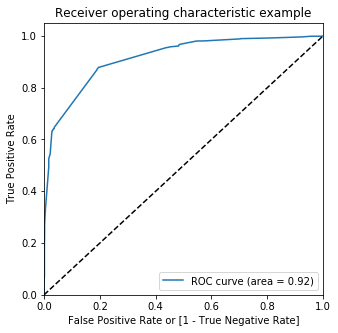

(array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        6.22277536e-04, 6.22277536e-04, 6.22277536e-04, 6.22277536e-04,
        1.24455507e-03, 1.24455507e-03, 1.24455507e-03, 1.24455507e-03,
        1.24455507e-03, 1.24455507e-03, 1.24455507e-03, 1.24455507e-03,
        1.24455507e-03, 1.24455507e-03, 1.24455507e-03, 1.24455507e-03,
        1.86683261e-03, 1.86683261e-03, 1.86683261e-03, 1.86683261e-03,
        1.86683261e-03, 1.86683261e-03, 1.86683261e-03, 4.97822029e-03,
        4.97822029e-03, 1.68014935e-02, 1.68014935e-02, 2.17797138e-02,
        2.80024891e-02, 2.80024891e-02, 2.98693217e-02, 3.11138768e-02,
        3.11138768e-02, 3.36029869e-02, 3.48475420e-02, 3.60920971e-02,
        3.60920971e-02, 3.67143746e-02, 1.89172371e-01, 1.89172371e-01,
        1.95395146e-01, 1.97261979e-01, 4.39950218e-01, 4.42439328e-01,
        4.44306161e-01, 4.50528936e-01, 4.82265090e-01, 4.822650

In [195]:
draw_roc(y_pred_final.Converted, y_pred_final.Converted_prob)


#### Since we got a value of 0.92, our model seems to be doing well on the test dataset.

## Calculating Lead score for the entire dataset
#### Lead Score = 100 * ConversionProbability
#### This needs to be calculated for all the leads from the original dataset (train + test)

In [196]:
# Selecting the test dataset along with the Conversion Probability and final predicted value for 'Converted'
data_test_pred = y_pred_final.copy()
data_test_pred.head()

,Prospect ID,Converted,Converted_prob,predicted
0,8910,0,0.000877,0
1,2948,0,0.215115,0
2,1067,1,0.412726,1
3,5047,0,0.412726,1
4,1010,1,0.128872,0


In [197]:
# Selecting the train dataset along with the Conversion Probability and final predicted value for 'Converted'
data_train_pred = y_train_pred_final.copy()
data_train_pred.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.899911,4403,1,1,1,1,1,1,1,1,1,1,0
1,0,0.004510,653,0,1,0,0,0,0,0,0,0,0,0
2,0,0.011482,1828,0,1,0,0,0,0,0,0,0,0,0
3,0,0.004510,749,0,1,0,0,0,0,0,0,0,0,0
4,1,0.812443,4482,1,1,1,1,1,1,1,1,1,1,0


In [198]:
# Dropping unnecessary columns from train dataset
data_train_pred = data_train_pred[['Prospect ID','Converted','Converted_prob','predicted']]
data_train_pred.head()

,Prospect ID,Converted,Converted_prob,predicted
0,4403,1,0.899911,1
1,653,0,0.004510,0
2,1828,0,0.011482,0
3,749,0,0.004510,0
4,4482,1,0.812443,1


### Concatenating the train and the test dataset with the Converted Probabilities¶


In [199]:
# Concatenating the 2 dataframes train and test along the rows with the append() function
data_full_pred = data_train_pred.append(data_test_pred)
data_full_pred.head()

,Prospect ID,Converted,Converted_prob,predicted
0,4403,1,0.899911,1
1,653,0,0.004510,0
2,1828,0,0.011482,0
3,749,0,0.004510,0
4,4482,1,0.812443,1


In [200]:
# Inspecting the shape of the final dataframe and the test and train dataframes
print(data_train_pred.shape)
print(data_test_pred.shape)
print(data_full_pred.shape)

(5793, 4)
(2483, 4)
(8276, 4)


In [201]:
# Ensuring the Prospect IDs are unique for each lead in the finl dataframe
len(data_full_pred['Prospect ID'].unique().tolist())

8276

In [202]:
# Calculating the Lead Score value
# Lead Score = 100 * Converted_prob
data_full_pred['Lead_Score'] = data_full_pred['Converted_prob'].apply(lambda x : round(x*100))
data_full_pred.head()

,Prospect ID,Converted,Converted_prob,predicted,Lead_Score
0,4403,1,0.899911,1,90
1,653,0,0.004510,0,0
2,1828,0,0.011482,0,1
3,749,0,0.004510,0,0
4,4482,1,0.812443,1,81


##  Determining Feature Importance¶
 
#### Selecting the coefficients of the selected features from our final model excluding the intercept¶



In [203]:
new_params = res.params[1:]
new_params

Do Not Email                                           -1.558264
Lead Origin_Lead Add Form                               2.548942
Lead Source_Welingak Website                            1.825111
Specialization_Others                                  -0.941655
What is your current occupation_Working Professional    2.946797
Tags_Busy                                               3.736568
Tags_Closed by Horizzon                                 9.067777
Tags_Lost to EINS                                       8.605247
Tags_Ringing                                           -1.024782
Tags_Will revert after reading the email                4.102678
Tags_switched off                                      -2.093772
Last Notable Activity_SMS Sent                          2.760330
dtype: float64

#### Getting a relative coeffient value for all the features wrt the feature with the highest coefficient¶


In [204]:
#feature_importance = abs(new_params)
feature_importance = new_params
feature_importance = 100.0 * (feature_importance / feature_importance.max())
feature_importance

Do Not Email                                            -17.184636
Lead Origin_Lead Add Form                                28.109893
Lead Source_Welingak Website                             20.127437
Specialization_Others                                   -10.384630
What is your current occupation_Working Professional     32.497458
Tags_Busy                                                41.207103
Tags_Closed by Horizzon                                 100.000000
Tags_Lost to EINS                                        94.899197
Tags_Ringing                                            -11.301362
Tags_Will revert after reading the email                 45.244585
Tags_switched off                                       -23.090249
Last Notable Activity_SMS Sent                           30.441093
dtype: float64

#### Sorting the feature variables based on their relative coefficient values¶


In [205]:
sorted_idx = np.argsort(feature_importance,kind='quicksort',order='list of str')
sorted_idx

Do Not Email                                            10
Lead Origin_Lead Add Form                                0
Lead Source_Welingak Website                             8
Specialization_Others                                    3
What is your current occupation_Working Professional     2
Tags_Busy                                                1
Tags_Closed by Horizzon                                 11
Tags_Lost to EINS                                        4
Tags_Ringing                                             5
Tags_Will revert after reading the email                 9
Tags_switched off                                        7
Last Notable Activity_SMS Sent                           6
dtype: int64

#### Plot showing the feature variables based on their relative coefficient values¶


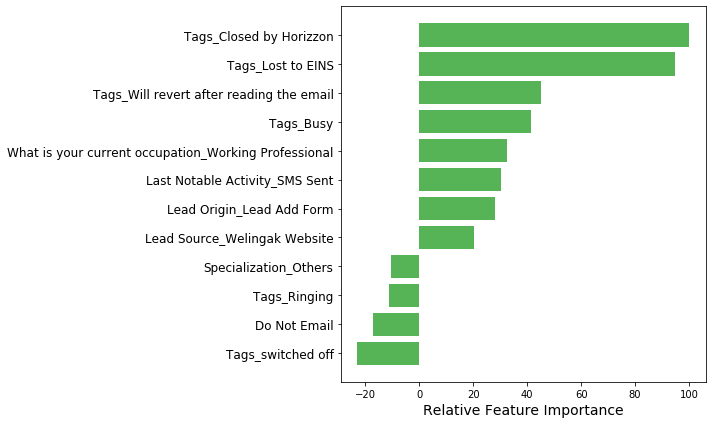

In [206]:
pos = np.arange(sorted_idx.shape[0]) + .5

featfig = plt.figure(figsize=(10,6))
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center', color = 'tab:green',alpha=0.8)
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X_train[col].columns)[sorted_idx], fontsize=12)
featax.set_xlabel('Relative Feature Importance', fontsize=14)

plt.tight_layout()   
plt.show()


#### Selecting Top 3 features which contribute most towards the probability of a lead getting converted

In [207]:
pd.DataFrame(feature_importance).reset_index().sort_values(by=0,ascending=False).head(3)


,index,0
6,Tags_Closed by Horizzon,100.000000
7,Tags_Lost to EINS,94.899197
9,Tags_Will revert after reading the email,45.244585


### Conclusion 

So we finally have a model with following characteristics:
    1. all variables p value less than 0.05.
    2. low vif's
    3. optimal cut off threshold at 0.4.
    
    Train set: accuracy-83.8  sensitivity -87.5       specificity -81     precision-74      recall-87.5        F1 - 80.1 Roc=93
    Test set : accuracy -83.12 sensiivity-86.9          specificity -81  precision :71.4     recall :86.9      F1-78.4   Roc=92